# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

In [6]:
recordingData = loader.getRecordingData('19') 
recordingData.backgroundImagePath

INFO:root:Downsampling recording 19 from 25.0 to 2.5
downsampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492008/492008 [00:20<00:00, 23441.94it/s]


'E:/Datasets/inD-dataset-v1.0/data/19_background.png'

In [29]:
recordingData.tracksMetaDf.head()

,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class,crossing,turn,onStreet
0,19,0,0,105,106,1.97574,4.73697,car,no,no,no
1,19,1,0,65,66,1.86671,4.55969,car,no,no,no
2,19,2,0,341,342,0.00000,0.00000,pedestrian,no,yes,no
3,19,3,0,24835,24836,2.06339,4.50165,car,no,no,no
4,19,4,0,24835,24836,1.82690,4.24700,car,no,no,no


In [30]:
recordingData.tracksMetaDf["class"].unique()

array(['car', 'pedestrian', 'bicycle', 'truck_bus'], dtype=object)

In [10]:
# recordingData.getCarIds()

In [11]:
# recordingData.getLargeVehicleIds()

In [12]:
# recordingData.getBicycleIds()

In [13]:
# recordingData.getPedIds()

In [14]:
# recordingData.getVehicleIds()

In [15]:
# frameDf = recordingData.getDfByFrameSpan(0, 0)

In [16]:
# len(frameDf)

In [17]:
# recordingData.getDfById(41)

In [9]:

from tools.UnitUtils import UnitUtils
allLocationSceneConfig = UnitUtils.loadSceneConfiguration()
sceneConfigs = allLocationSceneConfig['2']
sceneId = 22
sC = sceneConfigs[str(sceneId)]
print(sC)
sceneData = recordingData.getSceneData(sceneId, sC, refresh=True)


{'centerXPixel': 188.5, 'centerYPixel': 375.5, 'centerX': 18.43, 'centerY': -36.71, 'angle': 16.0, 'roadWidth': 9.0, 'boxWidth': 20.0}


clipping other trajectories for scene # 22: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127/127 [00:00<00:00, 139.98it/s]


In [10]:
sceneData.locationId

2

In [33]:
crossingDf = sceneData.getClippedPedDfs()
crossingDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY
0,19,72,4494,294,27.47322,-28.39536,226.52871,0.0,0.0,-0.82113,-0.79189,0.06228,-0.06205,19072,22,9.0,10.984726,5.499896
1,19,72,4495,295,27.44021,-28.42647,226.66922,0.0,0.0,-0.81933,-0.79613,0.06832,-0.07104,19072,22,9.0,10.944420,5.479090
2,19,72,4496,296,27.40717,-28.45804,226.81695,0.0,0.0,-0.81717,-0.80086,0.07487,-0.07857,19072,22,9.0,10.903958,5.457850
3,19,72,4497,297,27.37423,-28.48993,226.97185,0.0,0.0,-0.81461,-0.80597,0.08181,-0.08456,19072,22,9.0,10.863504,5.436275
4,19,72,4498,298,27.34118,-28.52233,227.13384,0.0,0.0,-0.81156,-0.81129,0.08903,-0.08898,19072,22,9.0,10.822804,5.414239


In [20]:
sceneData.uniquePedIds()

array([19072, 19075, 19081, 19125, 19343], dtype=int64)

In [21]:
sceneData.uniqueOtherIds()

array([19016, 19018, 19023, 19025, 19028, 19036, 19043, 19048, 19052,
       19061, 19064, 19067, 19073, 19077, 19079, 19083, 19085, 19089,
       19092, 19095, 19106, 19111, 19116, 19118, 19119, 19120, 19129,
       19130, 19131, 19137, 19139, 19144, 19151, 19154, 19164, 19165,
       19172, 19179, 19181, 19184, 19191, 19193, 19200, 19213, 19216,
       19218, 19227, 19228, 19229, 19231, 19239, 19248, 19257, 19258,
       19259, 19266, 19268, 19270, 19279, 19284, 19285, 19286, 19287,
       19290, 19292, 19298, 19301, 19303, 19306, 19308, 19317, 19324,
       19326, 19328, 19332, 19344, 19348, 19359, 19361, 19027, 19062,
       19065, 19076, 19080, 19087, 19097, 19100, 19122, 19123, 19127,
       19134, 19136, 19142, 19143, 19155, 19156, 19162, 19169, 19171,
       19182, 19185, 19186, 19192, 19195, 19206, 19208, 19234, 19245,
       19250, 19254, 19256, 19262, 19269, 19272, 19299, 19305, 19307,
       19330, 19333, 19342, 19345, 19347, 19351, 19354, 19355, 19367,
       19217, 19273]

In [22]:
# otherDf = sceneData.otherData
# otherDf.head()

In [24]:
otherDf = sceneData.getClippedOtherDfs()
otherDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,class,sceneX,sceneY
0,19,16,232,0,14.93550,-38.28918,13.93677,2.06353,5.15411,9.45846,2.33934,0.30338,0.15951,19016,22,9.0,car,-3.794410,-0.554791
1,19,16,233,1,15.31110,-38.19677,14.04475,2.06353,5.15411,9.48229,2.35018,0.29063,0.15568,19016,22,9.0,car,-3.407888,-0.569490
2,19,16,234,2,15.69011,-38.10361,14.17035,2.06353,5.15411,9.50583,2.36125,0.26607,0.14720,19016,22,9.0,car,-3.017882,-0.584408
3,19,16,235,3,16.07096,-38.00901,14.28860,2.06353,5.15411,9.52822,2.37198,0.22968,0.13388,19016,22,9.0,car,-2.625710,-0.598449
4,19,16,236,4,16.45418,-37.91362,14.39474,2.06353,5.15411,9.54838,2.38201,0.18193,0.11580,19016,22,9.0,car,-2.231043,-0.612384


In [28]:
otherDf["class"][0]

'car'

In [17]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

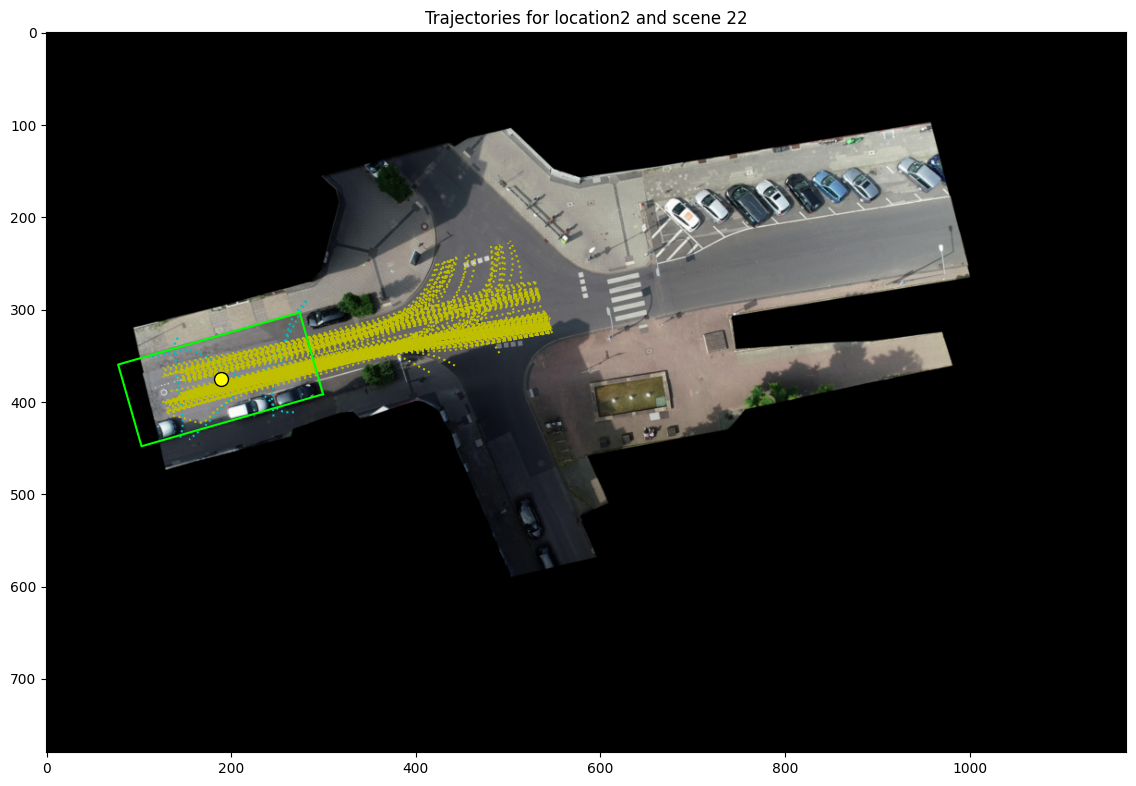

In [25]:
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=True)

In [11]:
localDf = sceneData.getPedDataInSceneCorrdinates()

In [12]:
localDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY
0,19,72,4540,340,26.19528,-29.97615,238.77605,0.0,0.0,-0.52503,-0.8284,0.21313,0.1434,19072,22,9.0,9.320567,4.332591
1,19,72,4550,350,25.99944,-30.29269,242.4037,0.0,0.0,-0.44166,-0.75322,0.26146,0.12559,19072,22,9.0,9.045063,4.082294
2,19,72,4560,360,25.84202,-30.58483,246.08436,0.0,0.0,-0.30992,-0.71068,0.26211,-0.00132,19072,22,9.0,8.813217,3.844862
3,19,72,4570,370,25.74525,-30.86465,249.51171,0.0,0.0,-0.21941,-0.74977,0.10346,-0.19737,19072,22,9.0,8.643066,3.602555
4,19,72,4580,380,25.66758,-31.18894,252.38229,0.0,0.0,-0.22207,-0.86046,-0.04916,-0.30787,19072,22,9.0,8.479019,3.312236


In [13]:
localMeta = sceneData.getMeta()

In [14]:
localMeta

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,19072,4540.0,4550.0,23,pedestrian,TrackDirection.WEST,TrackDirection.SOUTH
1,19075,4425.0,4435.0,26,pedestrian,TrackDirection.EAST,TrackDirection.SOUTH
2,19125,8342.0,8352.0,10,pedestrian,TrackDirection.WEST,TrackDirection.SOUTH
3,19343,23440.0,23450.0,25,pedestrian,TrackDirection.WEST,TrackDirection.SOUTH


In [15]:
sceneData.uniquePedIds()

<IntegerArray>
[19072, 19075, 19081, 19125, 19343]
Length: 5, dtype: Int64

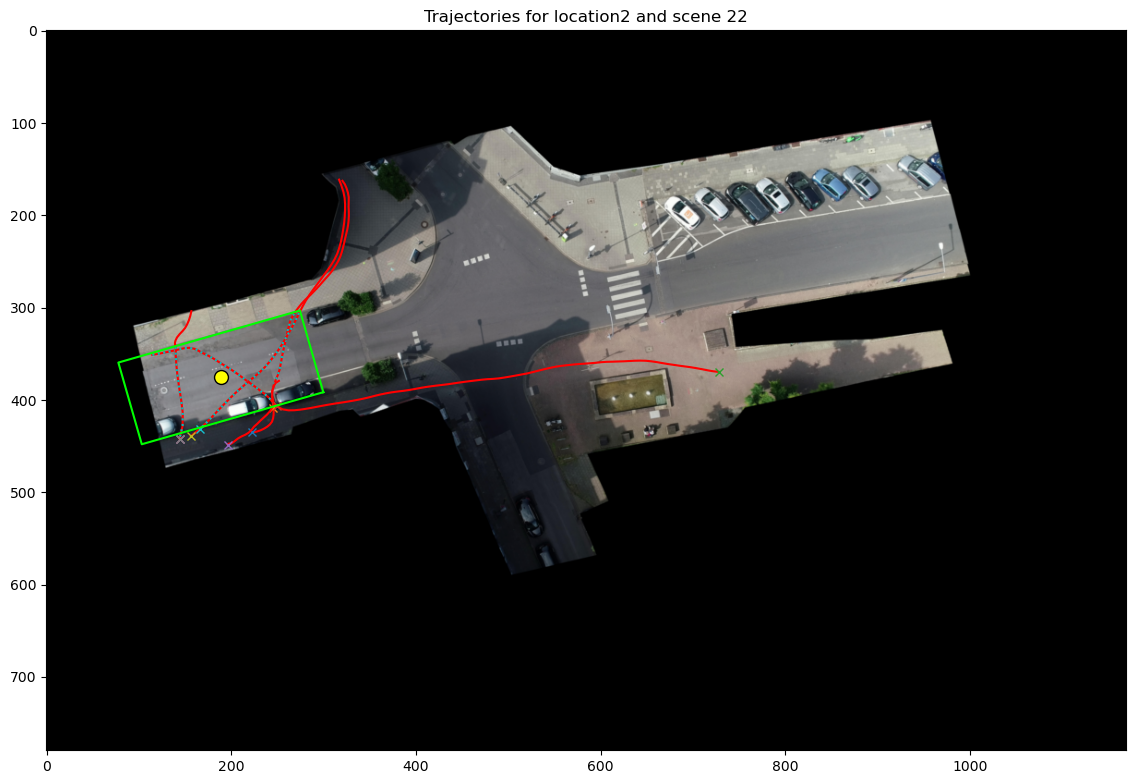

In [19]:
visualizer.showLocationSceneData(sceneData)